## Load all prescales info first

In [1]:
# read good_run_list.list
def get_good_run_list():
    good_run_list = []
    with open("../../lists/good_run_list.list") as f:
        for line in f:
            good_run_list.append(int(line.strip()))
    return good_run_list
good_run_list = get_good_run_list()
# this will be used as bins for the histograms

In [2]:
import pandas as pd
lumi_MB_JP2 =  pd.read_csv("lumi_VPDMB_JP2.csv", index_col="run")
lumi_MB_HT2 =  pd.read_csv("lumi_VPDMB_BHT2.csv",index_col="run")
# keep only JP2 columns 'sampled_lumi_JP2', 'prescale_JP2', 'livetime_JP2', 'nevents_JP2', 
lumi_JP2=lumi_MB_JP2[['sampled_lumi_JP2', 'prescale_JP2', 'livetime_JP2', 'nevents_JP2']]
# add lumi_JP2 to lumi_MB_HT2
lumi=lumi_MB_HT2.join(lumi_JP2)
# show na values
# bad runs for BHT2  - 13052057 ,  13052059
# unique run for BHT2 only - 13054047 (JP2 was absent)
# drop HT2_weight
lumi.drop(columns=['HT2_weight'], inplace=True)
    #  'sampled_lumi_MB', 'prescale_MB', 'livetime_MB', 'nevents_MB',
    #  'sampled_lumi_HT2', 'prescale_HT2', 'livetime_HT2', 'nevents_HT2',
    #  'sampled_lumi_JP2', 'prescale_JP2', 'livetime_JP2', 'nevents_JP2'
# calculate ratios for JP2 and HT2 to MB

# add good run list with na values

lumi = lumi.reindex(good_run_list)

triggers = ['JP2', 'HT2']
for trigger in triggers:
    lumi[f'prescale_MB_over_{trigger}'] = lumi[f'prescale_MB'] / lumi[f'prescale_{trigger}']
    lumi[f'livetime_{trigger}_over_MB'] = lumi[f'livetime_{trigger}'] / lumi[f'livetime_MB']
    lumi[f'nevents_MB_over_{trigger}'] = lumi[f'nevents_MB'] / lumi[f'nevents_{trigger}']

In [3]:
lumi

,sampled_lumi_MB,prescale_MB,livetime_MB,nevents_MB,sampled_lumi_HT2,prescale_HT2,livetime_HT2,nevents_HT2,sampled_lumi_JP2,prescale_JP2,livetime_JP2,nevents_JP2,prescale_MB_over_JP2,livetime_JP2_over_MB,nevents_MB_over_JP2,prescale_MB_over_HT2,livetime_HT2_over_MB,nevents_MB_over_HT2
run,,,,,,,,,,,,,,,,,,
13043027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13043029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13043034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13043046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13043062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13072016,0.000069,98.488945,0.915187,1727708.0,0.056269,1.0,0.915825,95108.0,0.056108,1.0,0.913190,127776.0,98.488945,0.997817,13.521381,98.488945,1.000697,18.165748
13072017,0.000050,94.062065,0.913841,1239436.0,0.038824,1.0,0.915729,65186.0,0.038670,1.0,0.912101,87599.0,94.062065,0.998096,14.148974,94.062065,1.002066,19.013837
13072018,0.000050,89.829498,0.913085,1249065.0,0.037561,1.0,0.913867,63087.0,0.037365,1.0,0.909080,83824.0,89.829498,0.995614,14.901043,89.829498,1.000857,19.799087


## Analyze the data MB, JP2, HT2

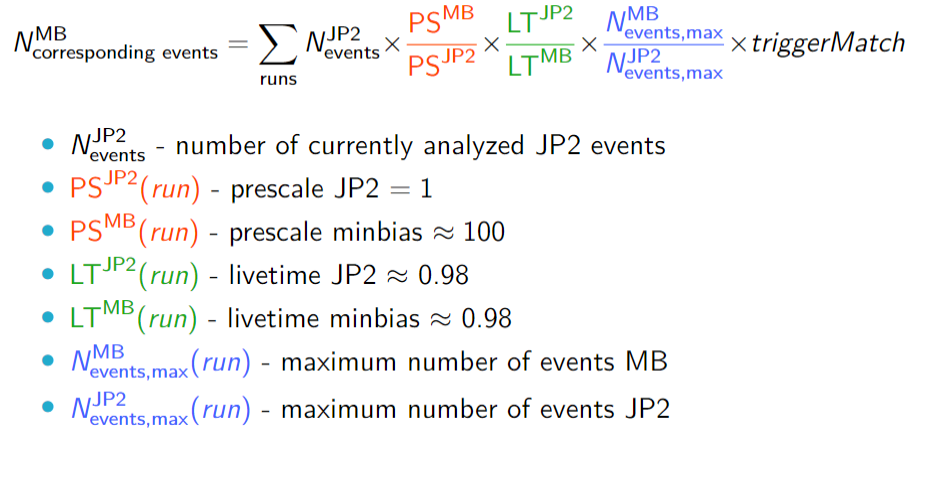

In [4]:
import ROOT
%jsroot on

def dataframe_to_TH1(df,column, hist_name="hist"):
    """
    Convert a Pandas DataFrame with into a ROOT TH1D histogram.
    Returns:
    - ROOT.TH1D histogram with custom bin labels.
    """
    rows = df.index.to_list()  # Extract run IDs
    entries = df[column].to_list()  # Extract event counts
    name = df.index.name  # Get the name of the index column
    n_bins = len(rows)
    hist = ROOT.TH1D(hist_name, hist_name, n_bins, 0, n_bins)  # Create histogram
    # Assign bin labels and fill histogram
    for i, run_id in enumerate(rows):
   
        bin_index = i + 1  # ROOT bins start from 1
        hist.GetXaxis().SetBinLabel(bin_index, str(run_id))  # Set custom labels
        # skip nan values
        if entries[i] == entries[i]:        
            hist.SetBinContent(bin_index, entries[i])  # Fill with event counts
    return hist

save_file= ROOT.TFile("lumi.root", "RECREATE")


for trigger in triggers:
    can = ROOT.TCanvas(f'can_{trigger}', f'can_{trigger}', 800, 600)
    can.Draw()
    can.SetLogy()

    prescale_ratio = dataframe_to_TH1(lumi, f'prescale_MB_over_{trigger}', f'prescale_MB_over_{trigger}')
    livetime_ratio = dataframe_to_TH1(lumi, f'livetime_{trigger}_over_MB', f'livetime_{trigger}_over_MB')
    maxnevent_ratio = dataframe_to_TH1(lumi, f'nevents_MB_over_{trigger}', f'nevents_MB_over_{trigger}')
    luminosity = dataframe_to_TH1(lumi, f'sampled_lumi_{trigger}', f'luminosity_{trigger}')

    luminosity.SetMarkerColor(ROOT.kRed)
    luminosity.SetLineColor(ROOT.kRed)
    luminosity.SetMarkerStyle (23)
    luminosity.SetMarkerSize(0.8)

    prescale_ratio.SetMarkerColor(ROOT.kMagenta+1) 
    prescale_ratio.SetLineColor(ROOT.kMagenta+1)
    prescale_ratio.SetMarkerStyle (20)
    prescale_ratio.SetMarkerSize(0.8)
    livetime_ratio.SetMarkerColor(ROOT.kAzure)
    livetime_ratio.SetLineColor(ROOT.kAzure)
    livetime_ratio.SetMarkerStyle (21)
    livetime_ratio.SetMarkerSize(0.8)
    maxnevent_ratio.SetMarkerColor(ROOT.kOrange+1)
    maxnevent_ratio.SetLineColor(ROOT.kOrange+1)
    maxnevent_ratio.SetMarkerStyle (22)
    maxnevent_ratio.SetMarkerSize(0.8)
    leg = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
    leg.AddEntry(prescale_ratio, f'prescale MB/{trigger}', 'p')
    leg.AddEntry(livetime_ratio, f'livetime {trigger}/MB', 'p')
    leg.AddEntry(maxnevent_ratio, f'maxnevents MB/{trigger}', 'p')
    prescale_ratio.SetTitle(f'{trigger};runid; ratio')
    # set grid
    prescale_ratio.GetYaxis().SetRangeUser(0.2, prescale_ratio.GetMaximum()*1.2)
    prescale_ratio.Draw("pl")
    livetime_ratio.Draw("lp same")
    maxnevent_ratio.Draw("lp same ")
    leg.Draw()

    save_file.cd()
    can.Write()
    prescale_ratio.Write()
    livetime_ratio.Write()
    maxnevent_ratio.Write()
    luminosity.Write()


luminosity_MB = dataframe_to_TH1(lumi, f'sampled_lumi_MB', f'luminosity_MB')
luminosity_MB.SetMarkerColor(ROOT.kRed)
luminosity_MB.SetLineColor(ROOT.kRed)
luminosity_MB.SetMarkerStyle (23)
luminosity_MB.SetMarkerSize(0.8)
luminosity_MB.Write()

TClassTable::Add:0: RuntimeWarning: class timespec already in TClassTable
Error in <TExMap::Add>: key 140715935016528 is not unique
Error in <TExMap::Add>: key 140715935582448 is not unique
TClassTable::Add:0: RuntimeWarning: class reverse_iterator<__gnu_cxx::__normal_iterator<int*,vector<int> > > already in TClassTable
TClassTable::Add:0: RuntimeWarning: class reverse_iterator<__gnu_cxx::__normal_iterator<string*,vector<string> > > already in TClassTable
TClassTable::Add:0: RuntimeWarning: class reverse_iterator<__gnu_cxx::__normal_iterator<TString*,vector<TString> > > already in TClassTable
TClassTable::Add:0: RuntimeWarning: class __gnu_cxx::__normal_iterator<const char*,string> already in TClassTable
TClassTable::Add:0: RuntimeWarning: class __gnu_cxx::__normal_iterator<char*,string> already in TClassTable
TClassTable::Add:0: RuntimeWarning: class __gnu_cxx::__normal_iterator<int*,vector<int> > already in TClassTable
TClassTable::Add:0: RuntimeWarning: class __gnu_cxx::__normal_ite

7352

In [5]:
save_file.Close()

In [6]:
import ROOT
import uproot
import awkward as ak
path='/home/prozorov/dev/star/jets_pp_2012/output/'
triggers = ['MB', 'JP2', 'HT2']
tree_name = 'ResultTree'  # Update this to your tree name
branch_names = ['runid1', 'pt', 'trigger_match_jp', 'trigger_match_ht']
pt_vs_run_raw = {}
pt_vs_run_trigger = {}

run_map = {run: i for i, run in enumerate(lumi.index.tolist())}

run_map_inv = {i: run for i, run in enumerate(lumi.index.tolist())}

for trigger in triggers:
    print(f'Processing trigger {trigger}')
    file_name = path + f'jets_{trigger}.root'
    my_file=ROOT.TFile(file_name)
    analyzed_event_hist= my_file.Get('hEventsRun')
    nbins=analyzed_event_hist.GetNbinsX()
    root_file=uproot.open(file_name)
    tree = root_file[tree_name]
    tree_arrays = tree.arrays(branch_names)
    # convert runid1 to run_mapped
    tree_arrays['run_mapped'] = [run_map[runid] for runid in tree_arrays['runid1']]

    if trigger in ['JP2', 'HT2']:
        if trigger=='JP2':
                addition_name='jp'
        elif trigger=='HT2':
                addition_name='ht'
        else:
                addition_name=''
        df = ak.to_rdataframe({"pt": tree_arrays['pt'], "run_mapped": tree_arrays['run_mapped'], "trigger_match": tree_arrays[f'trigger_match_{addition_name}']})
    else:
        df = ak.to_rdataframe({"pt": tree_arrays['pt'], "run_mapped": tree_arrays['run_mapped']})

    
    title = '; run ;p_{t}, GeV/c; counts'
    # title_1d = '; p_{t}, GeV/c; counts'
    pt_vs_run = df.Histo2D((f'{trigger}_pt_vs_run', f'{trigger} pt'+title,nbins,0,nbins, 100, 0, 100), "run_mapped","pt")
    # pt_1d = df.Histo1D((f'{trigger}_pt',  f'{trigger} pt'+title_1d, 100, 0, 100), "pt")

    # set labels equal to runid
    for i in range(1, nbins+1):
        pt_vs_run.GetXaxis().SetBinLabel(i, str(lumi.index[i-1]))


    pt_vs_run_raw[trigger] = pt_vs_run

    if trigger in ['JP2', 'HT2']:
        hist_2d_trigger= df.Define("triggered_pt", "pt[trigger_match]").Histo2D((f'{trigger}_pt_vs_run_trigger', f'{trigger} pt triggered'+title,nbins,0,nbins, 100, 0, 100), "run_mapped","triggered_pt")

            # set labels equal to runid
        for i in range(1, nbins+1):
            hist_2d_trigger.GetXaxis().SetBinLabel(i, str(lumi.index[i-1]))
        pt_vs_run_trigger[trigger] = hist_2d_trigger


outfile_2d = ROOT.TFile("pt_vs_run.root", "RECREATE")
for trigger in triggers:
    pt_vs_run_raw[trigger].Write()
    if trigger in ['JP2', 'HT2']:
        pt_vs_run_trigger[trigger].Write()
outfile_2d.Close()


Processing trigger MB
Processing trigger JP2
Processing trigger HT2


Warning in <TClass::Init>: no dictionary for class TStarJetVectorJet is available
Warning in <TClass::Init>: no dictionary for class TStarJetVector is available
Warning in <TColor::TColor>: color 2000 already defined
Warning in <TColor::TColor>: color 2001 already defined
Warning in <TColor::TColor>: color 2002 already defined
Warning in <TColor::TColor>: color 2003 already defined
Warning in <TColor::TColor>: color 2004 already defined
Warning in <TColor::TColor>: color 2005 already defined
Warning in <TColor::TColor>: color 2006 already defined
Warning in <TColor::TColor>: color 2007 already defined
Warning in <TColor::TColor>: color 2008 already defined
Warning in <TColor::TColor>: color 2009 already defined
Warning in <TColor::TColor>: color 2010 already defined
Warning in <TColor::TColor>: color 2011 already defined
Warning in <TColor::TColor>: color 2012 already defined
Warning in <TColor::TColor>: color 3000 already defined
Warning in <TColor::TColor>: color 3001 already defined

In [7]:
analyzed_events = {}
for trigger in triggers:
    file_name = path + f'jets_{trigger}.root'
    my_file=ROOT.TFile(file_name)
    analyzed_event_hist= my_file.Get('hEventsRun').Clone(f'hEventsRun_{trigger}')
    analyzed_event_hist.SetTitle(f'Analyzed events {trigger};runid;counts')
    analyzed_event_hist.SetDirectory(0)
    analyzed_events[trigger] = analyzed_event_hist

In [8]:
can=ROOT.TCanvas('can','can',800,600)
can.Divide(2,3)
can.Draw()

can.cd(1)
pt_vs_run_raw['MB'].Draw('colz')

can.cd(3)
pt_vs_run_raw['JP2'].Draw('colz')

can.cd(4)
pt_vs_run_trigger['JP2'].Draw('colz')

can.cd(5)
pt_vs_run_raw['HT2'].Draw('colz')

can.cd(6)
pt_vs_run_trigger['HT2'].Draw('colz')


In [9]:
can=ROOT.TCanvas('can_events','',1600,600)
can.Divide(3,2)
can.Draw()

can.cd(1)
analyzed_events['MB'].Draw('')

can.cd(2)
analyzed_events['JP2'].Draw('')

can.cd(3)
analyzed_events['HT2'].Draw('')

ratio_analyzed_events={}

can.cd(5)
ratio_analyzed_events['JP2'] = analyzed_events['JP2'].Clone('ratio_JP2')
ratio_analyzed_events['JP2'].Divide(analyzed_events['MB'])
ratio_analyzed_events['JP2'].Draw('')
ratio_analyzed_events['JP2'].SetTitle('JP2/MB')

can.cd(6)
ratio_analyzed_events['HT2'] = analyzed_events['HT2'].Clone('ratio_HT2')
ratio_analyzed_events['HT2'].Divide(analyzed_events['MB'])
ratio_analyzed_events['HT2'].Draw('')
ratio_analyzed_events['HT2'].SetTitle('HT2/MB')



In [10]:
# load histograms
pt_vs_run_raw = {}
pt_vs_run_trigger = {}
infile_2d = ROOT.TFile("pt_vs_run.root")
for trigger in triggers:
    pt_vs_run_raw[trigger] = infile_2d.Get(f'{trigger}_pt_vs_run')
    if trigger in ['JP2', 'HT2']:
        pt_vs_run_trigger[trigger] = infile_2d.Get(f'{trigger}_pt_vs_run_trigger')

In [21]:
# load histograms
pt_vs_run_raw = {}
pt_vs_run_trigger = {}
infile_2d = ROOT.TFile("pt_vs_run.root")
for trigger in triggers:
    pt_vs_run_raw[trigger] = infile_2d.Get(f'{trigger}_pt_vs_run')
    if trigger in ['JP2', 'HT2']:
        pt_vs_run_trigger[trigger] = infile_2d.Get(f'{trigger}_pt_vs_run_trigger')
 
bad_runs_JP2=[  13048019,
                13048092,
                13048093,
                13049006,
                13049007,
                13051074,
                13051099,
                13052061,
                13061035,
                13064067,
                13068060,
                13069023,
                13070061,
                13063012]
# make a  function to multiply 2D histogram x:runid vs y:pt by 1D histogram x:runid

def divide_by_run(pt_vs_run, run_hist, name, ratio_hist=None):
    pt_vs_run_copy = pt_vs_run.Clone(name)


    for i in range(1, pt_vs_run.GetNbinsX() + 1):
        bin_content = run_hist.GetBinContent(i)
        runid= run_hist.GetXaxis().GetBinLabel(i)

        # consider only those runs which has ratio_hist bin content > 0
        if ratio_hist:
            if ratio_hist.GetBinContent(i) == 0:
                bin_content = 0

        # exclude bad runs
        if int(runid) in bad_runs_JP2:
            bin_content=0
        if bin_content == 0:
            scale = 0
        else:
            scale = 1 / bin_content

        for j in range(1, pt_vs_run.GetNbinsY() + 1):
            pt_vs_run_copy.SetBinContent(i, j, pt_vs_run.GetBinContent(i, j) * scale)
            pt_vs_run_copy.SetBinError(i, j, pt_vs_run.GetBinError(i, j) * scale)
    return pt_vs_run_copy

lumi=ROOT.TFile("lumi.root")

    # prescale_ratio =  f'prescale_MB_over_{trigger}'
    # livetime_ratio =  f'livetime_{trigger}_over_MB'
    # maxnevent_ratio =  f'nevents_MB_over_{trigger}'

# divide by analyzed events
normalized_events = {}

# for trigger in triggers:
#     normalized_events[trigger] = divide_by_run(pt_vs_run_raw[trigger], analyzed_events[trigger], f'{trigger}_normalized')
    
normalized_triggered_events = {}
normalized_events_livetime = {}
normalized_events_livetime_prescale = {}
normalized_events_livetime_prescale_maxnevents = {}
total_cross_section = {}
normalized_mb_events = {}
full_ratio={}

for trigger in ['JP2', 'HT2']:

    normalized_mb_events[trigger] = divide_by_run(pt_vs_run_raw['MB'],analyzed_events['MB'], f'MB_for_{trigger}', ratio_hist=ratio_analyzed_events[trigger])

    normalized_events[trigger] = divide_by_run(pt_vs_run_raw[trigger], analyzed_events[trigger], f'{trigger}_normalized')

    normalized_triggered_events[trigger] = divide_by_run(pt_vs_run_trigger[trigger], analyzed_events[trigger], f'{trigger}_triggered_normalized')
# divide by livetime factor
    livetime_ratio= lumi.Get(f'livetime_{trigger}_over_MB')
    normalized_events_livetime[trigger] = divide_by_run(normalized_triggered_events[trigger], livetime_ratio, f'{trigger}_livetime')
# divide by prescale factor
    prescale_ratio= lumi.Get(f'prescale_MB_over_{trigger}')
    normalized_events_livetime_prescale[trigger] = divide_by_run(normalized_events_livetime[trigger], prescale_ratio, f'{trigger}_prescale')
# divide by maxnevents factor
    maxnevent_ratio= lumi.Get(f'nevents_MB_over_{trigger}')
    normalized_events_livetime_prescale_maxnevents[trigger] = divide_by_run(normalized_events_livetime_prescale[trigger], maxnevent_ratio, f'{trigger}_maxnevents')
    full_ratio[trigger] = normalized_events_livetime_prescale_maxnevents[trigger].Clone(f'full_ratio_{trigger}')
    full_ratio[trigger].Divide(normalized_mb_events[trigger])

    #divide by luminosity
    luminosity = lumi.Get(f'luminosity_MB')
    total_cross_section[trigger] = divide_by_run(normalized_events_livetime_prescale_maxnevents[trigger], luminosity, f'{trigger}_cross_section')




# make 1d histogram out of this histograms
def get_1d(pt_vs_run, name):
    analyzed_runs=0
    temp = pt_vs_run.ProjectionY('', 1, 1)
    output=ROOT.TH1D(name+'_per_run', name+ ';'+pt_vs_run.GetYaxis().GetTitle()+';counts per event', temp.GetNbinsX(), temp.GetXaxis().GetXmin(), temp.GetXaxis().GetXmax())
    for i in range(1, pt_vs_run.GetNbinsX() + 1):
         projection = pt_vs_run.ProjectionY(f'{name}_{i}', i, i)
         if projection.Integral() == 0:
            continue
         analyzed_runs+=1
         output.Add(projection)
    output.Scale(1/analyzed_runs)
    
    return output


normalized_mb_events_1d = {}
normalized_events_1d = {}
normalized_triggered_events_1d = {}
normalized_events_livetime_1d = {}
normalized_events_livetime_prescale_1d = {}
normalized_events_livetime_prescale_maxnevents_1d = {}
full_ratio_1d = {}
total_cross_section_1d = {}

# save histograms
outfile_2d = ROOT.TFile("pt_vs_run_normalized.root", "RECREATE")
for trigger in ['JP2', 'HT2']:
    normalized_mb_events[trigger].Write()
    normalized_mb_events_1d[trigger] = get_1d(normalized_mb_events[trigger], 'MB_for'+trigger)
    normalized_mb_events_1d[trigger].Write()

    normalized_events[trigger].Write()
    normalized_events_1d[trigger] = get_1d(normalized_events[trigger], trigger)
    normalized_events_1d[trigger].Write()



    normalized_triggered_events[trigger].Write()
    normalized_events_livetime[trigger].Write()
    normalized_events_livetime_prescale[trigger].Write()
    normalized_events_livetime_prescale_maxnevents[trigger].Write()
    full_ratio[trigger].Write()


    normalized_triggered_events_1d[trigger] = get_1d(normalized_triggered_events[trigger], trigger+'_trigger')
    normalized_triggered_events_1d[trigger].Write()
    normalized_events_livetime_1d[trigger] = get_1d(normalized_events_livetime[trigger], trigger+'_livetime')
    normalized_events_livetime_1d[trigger].Write()
    normalized_events_livetime_prescale_1d[trigger] = get_1d(normalized_events_livetime_prescale[trigger], trigger+'_prescale')
    normalized_events_livetime_prescale_1d[trigger].Write()
    normalized_events_livetime_prescale_maxnevents_1d[trigger] = get_1d(normalized_events_livetime_prescale_maxnevents[trigger], trigger+'_maxnevents')
    normalized_events_livetime_prescale_maxnevents_1d[trigger].Write()
    full_ratio_1d[trigger] = get_1d(full_ratio[trigger], f'full_ratio_{trigger}')
    full_ratio_1d[trigger].Write()

    total_cross_section[trigger].Write()
    total_cross_section_1d[trigger] = get_1d(total_cross_section[trigger], f'cross_section_{trigger}')
    total_cross_section_1d[trigger].Write()

 outfile_2d.Close()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 158)

In [22]:
# plot all 1# compare 1D distributions
can1d = ROOT.TCanvas('can1d', 'can1d', 800, 600)
title = ';p_{t}, GeV/c; counts per event'

trigger='HT2'
# trigger='JP2'

mb_norm = normalized_mb_events_1d[trigger]

h1_norm_trigger                       = normalized_triggered_events_1d[trigger]
h1_norm_trigger_lt                    = normalized_events_livetime_1d[trigger]
h1_norm_trigger_lt_ps                 = normalized_events_livetime_prescale_1d[trigger]
h1_norm_trigger_lt_ps_maxevt          = normalized_events_livetime_prescale_maxnevents_1d[trigger]

can1d.Draw()
can1d.SetLogy()

h1_norm_trigger.SetMarkerColor(ROOT.kBlack)
h1_norm_trigger.SetLineColor(ROOT.kBlack)
h1_norm_trigger.SetMarkerStyle (24)
h1_norm_trigger.SetMarkerSize(0.8)

h1_norm_trigger_lt_ps.SetMarkerColor(ROOT.kRed) 
h1_norm_trigger_lt_ps.SetLineColor(ROOT.kRed)
h1_norm_trigger_lt_ps.SetMarkerStyle (20)
h1_norm_trigger_lt_ps.SetMarkerSize(0.8)
h1_norm_trigger_lt.SetMarkerColor(ROOT.kMagenta)
h1_norm_trigger_lt.SetLineColor(ROOT.kMagenta)
h1_norm_trigger_lt.SetMarkerStyle (21)
h1_norm_trigger_lt.SetMarkerSize(0.8)
h1_norm_trigger_lt_ps_maxevt.SetMarkerColor(ROOT.kBlue-1)
h1_norm_trigger_lt_ps_maxevt.SetLineColor(ROOT.kBlue-1)
h1_norm_trigger_lt_ps_maxevt.SetMarkerStyle (22)
h1_norm_trigger_lt_ps_maxevt.SetMarkerSize(0.8)


mb_norm.SetMarkerColor(ROOT.kAzure)
mb_norm.SetLineColor(ROOT.kAzure)
mb_norm.SetMarkerStyle (24)
mb_norm.SetMarkerSize(0.8)
h1_norm_trigger.GetYaxis().SetRangeUser(1e-9, h1_norm_trigger.GetMaximum()*1.2)
h1_norm_trigger.GetXaxis().SetRangeUser(0, 50)
h1_norm_trigger.Draw('pe')
h1_norm_trigger_lt.Draw('same pe')
h1_norm_trigger_lt_ps.Draw('same pe')
h1_norm_trigger_lt_ps_maxevt.Draw('same pe')
mb_norm.Draw('same pe')
can1d.BuildLegend()
can1d.Draw()

# can1d.SaveAs(f'plots/{trigger}_1d.pdf')



Warning in <TCanvas::Constructor>: Deleting canvas with same name: can1d


In [23]:
can=ROOT.TCanvas('can','can',800,600)
can.Draw()
ratioPlot = ROOT.TRatioPlot(h1_norm_trigger_lt_ps_maxevt, mb_norm)
ratioPlot.SetH1DrawOpt("pe")
ratioPlot.SetH2DrawOpt("pe")
# set ratio title


# add legend
leg = ROOT.TLegend(0.7, 0.7, 0.85, 0.85)
leg.AddEntry(h1_norm_trigger_lt_ps_maxevt, f'{trigger}', 'pe')
leg.AddEntry(mb_norm, 'MB', 'pe')



ratioPlot.Draw()
leg.Draw()
# set log scale of y axis
ratioPlot.GetUpperPad().SetLogy()
ratioPlot.GetLowerRefGraph().GetYaxis().SetTitle(f'MB/{trigger}')
ratioPlot.GetLowerRefYaxis().SetRangeUser(0, 2)




Warning in <TCanvas::Constructor>: Deleting canvas with same name: can
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 68 points have been skipped


In [14]:
# load Dmitry's histograms
path='./jet_cross_section_dmitriy.root'
file=ROOT.TFile(path)
base_hist=file.Get('crossSection_systematic')

In [15]:
can.Draw()
can.SetLogy()
base_hist.Draw('pe')
total_cross_section_1d[trigger].Draw('same pe')
